In [1]:
import pandas as pd
import os
from utilities import df_from_ieee_csv_file, df_from_scopus_csv_file, inject_detected_countries_to, mark_duplicates_in
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Directory containing .csv files
folder_path = 'csv'

In [3]:
# Get all IEEE .csv files in the folder
ieee_csv_files = [os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path) if file_name.endswith('ieee.csv')]

# Map each csv file to a dataframe with standardized column names
ieee_dfs = list(map(df_from_ieee_csv_file, ieee_csv_files))

In [4]:
# Get all IEEE .csv files in the folder
scopus_csv_files = [os.path.join(folder_path, file_name) for file_name in os.listdir(folder_path) if file_name.endswith('scopus.csv')]

# Map each csv file to a dataframe with standardized column names
scopus_dfs = list(map(df_from_scopus_csv_file, scopus_csv_files))

In [5]:
dfs = pd.concat(scopus_dfs + ieee_dfs)
dfs = dfs.reset_index(drop=True)

In [6]:
mark_duplicates_in(dfs)

In [7]:
dfs = dfs.drop_duplicates(subset='title_canonical', keep='first')
dfs = dfs.reset_index(drop=True)

In [8]:
# Use the same type for both IEEE and Scopus journal and conference articles.
replacement_dict = {
    'IEEE Journals': 'Article',
    'IEEE Conferences': 'Conference paper'
}

# Replace the values in-place
dfs['type'].replace(replacement_dict, inplace=True)

# Export
In case you want to export the dataframe to work with it outsite this notebook, uncomment the following lines

In [9]:
# Convert the list of countries to a string representation
# plain_df = dfs
# plain_df['countries'] = plain_df['countries'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
# plain_df.to_excel("full-list.xlsx", index=False)

# Publications by year

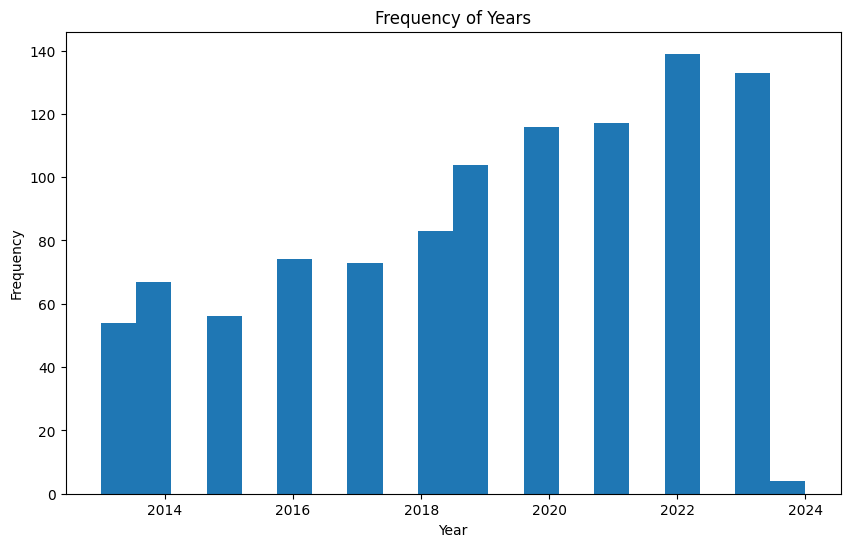

In [10]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
dfs['year'].hist(bins=20)  # Adjust the number of bins as needed
plt.title('Frequency of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [11]:
inject_detected_countries_to(dfs)

# Publications by country 

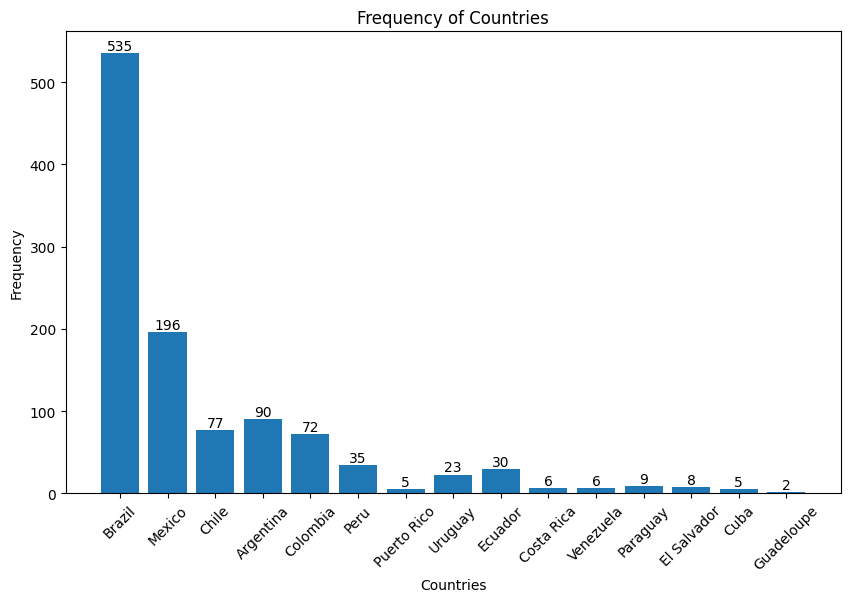

In [12]:
# Flatten the 'countries' column to get a single list of countries
all_countries = [country for sublist in dfs['countries'] for country in sublist]

# Count the frequency of each country
country_counts = dict(Counter(all_countries))

# Plotting the frequency of countries
plt.figure(figsize=(10, 6))
bars = plt.bar(country_counts.keys(), country_counts.values())

# Agregar los valores en la parte superior de cada barra
for bar, value in zip(bars, country_counts.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.title('Frequency of Countries')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

# Attempt to identify prolific authors

In [18]:
dfs['authors_list'] = (dfs['authors'].str.lower().str.split(';'))
dfs['authors_list'] = dfs['authors_list'].apply(lambda x: [author.strip() for author in x])

author_index = dfs['authors_list'].explode()
author_counts = dfs['authors_list'].explode().value_counts()
indices = author_counts.index
author_counts_df = author_counts.to_frame('articles').reset_index()

In [19]:
dfs['authors_list']

0       [rao g.v.e., b. r., srinivasu p.n., ijaz m.f.,...
1       [silva j.f., fabris g.s.l., sambrano j.r., alb...
2       [rangel-peña u.j., zárate-hernández l.a., cama...
3       [rodrigues j.l., ligorio r.f., krawczuk a., di...
4       [bezerra l.l., correia a.n., de lima-neto p., ...
                              ...                        
1015    [a. tronev, d. zuev, s. makarov, s. stepanov, ...
1016    [z. deng, j. sun, h. zhang, i. de leon, r. p. ...
1017    [j. baxter, a. c. lesina, i. de leon, l. ramunno]
1018    [a. faz-mendoza, n. k. gamboa-rosales, c. e. m...
1019    [j. c. mayo-maldonado, j. e. valdez-resendiz, ...
Name: authors_list, Length: 1020, dtype: object

# Sort by author name to try to visually find duplicates due to alternative spellings
It its possible that the same author is included with alternative spellings. If that were the case, it should not have a major impact in identifying the most prolific authors (as there are not many alternative spellings). Visual confirmation is anyway interesting.   

In [20]:
author_counts_df_by_name = author_counts_df.sort_values(by='index', ascending=True, inplace=False)

KeyError: 'index'

In [21]:
author_counts_df

,authors_list,articles
0,venegas-andraca s.e.,22
1,da silva a.j.,21
2,portugal r.,18
3,de oliveira w.r.,17
4,ludermir t.b.,14
...,...,...
3553,martínez d.,1
3554,garcía t.,1
3555,guerrero n.,1
3556,abbott a.a.,1


In [19]:
author_counts_df.sort_values(by='authors_list', ascending=False, inplace=False)

,authors_list,articles
1822,Ávila A.,1
2645,Álvarez J.R.,1
799,s-Orob&#x00F3,1
853,nez-Mart&#x00ED,1
493,n,2
...,...,...
849,A. Abelenda,1
1599,A. A. da Cruz,1
2015,A. A. Serga,1
1667,A. A. Quivy,1
